### Decision Tree Classification on the iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

df = pd.DataFrame(data = data['data'], columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X = df
y = data.target

# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 95)

X_train.shape , y_train.shape

((120, 4), (120,))

### Decision Tree classifier

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')   #basic model

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

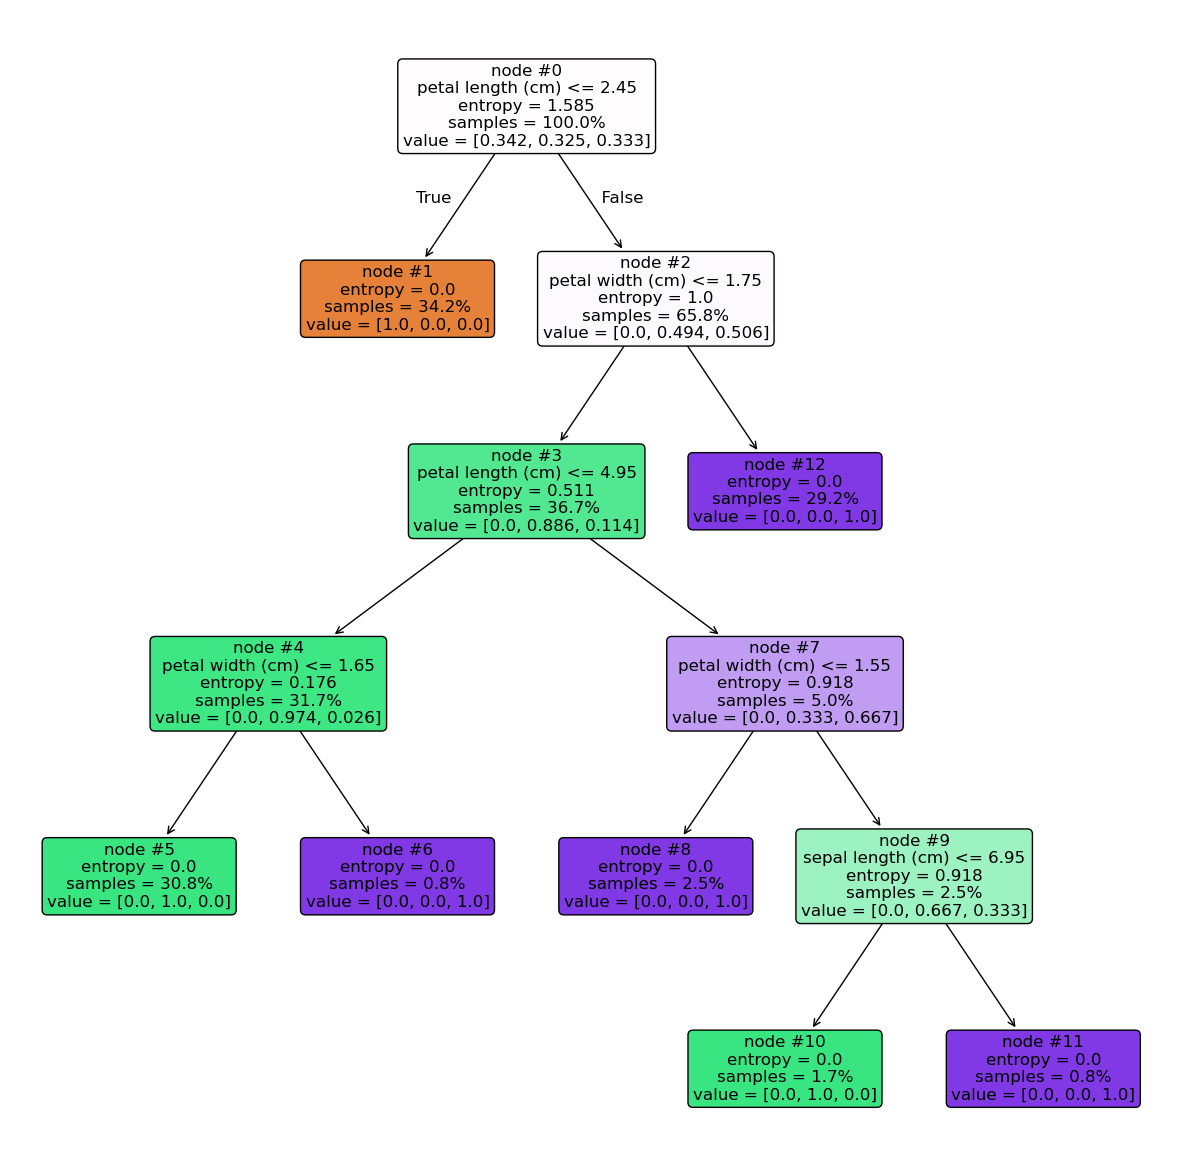

In [ ]:
,## Visualization of the tree
from sklearn import tree

plt.figure(figsize = (15,15))
tree.plot_tree(dt_clf, rounded = True, filled = True, feature_names = data.feature_names, node_ids= True, class_names=data.target_names)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = dt_clf.predict(X_test)
print(f"Accuracy Score : {accuracy_score(y_test, y_pred):.3f}")

Accuracy Score : 0.967


In [17]:
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [22]:
## To apply a post pruning we can add the parameter max_depth to limit the split

## HYPER PARAMETER TUNING
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(1, 10, 1),
    'min_samples_leaf' : range(1, 20, 2),
    'min_samples_split' : range(2, 20, 2),
    'max_features' : ['sqrt', 'log2', 'auto'],
    
}

dt_model = DecisionTreeClassifier(random_state = 95)
grid_search = GridSearchCV(estimator = dt_model, param_grid=parameters, cv=5, verbose=True)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4860 candidates, totalling 24300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=95),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)},
             verbose=True)

In [23]:
print("Best Accuracy: " , grid_search.best_score_)
print(grid_search.best_estimator_)

Best Accuracy:  0.9666666666666668
DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=95)


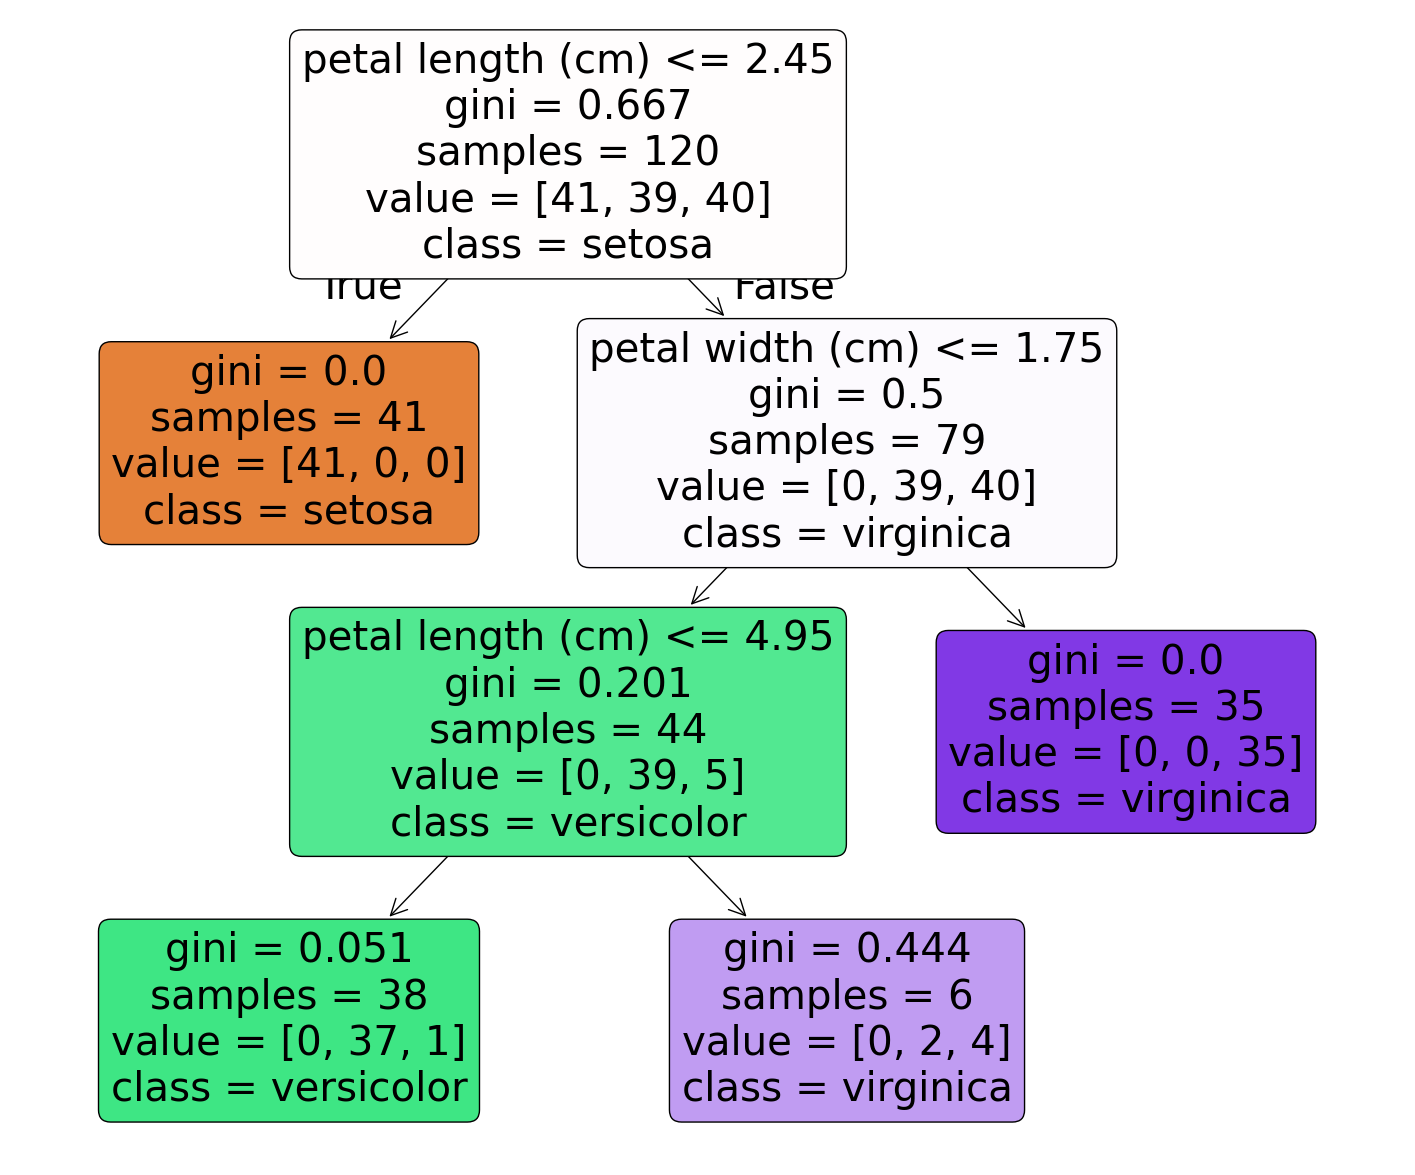

In [24]:
tuned_clf = grid_search.best_estimator_

## visualization
plt.figure(figsize=(18,15))
tree.plot_tree(tuned_clf, filled= True, rounded= True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

**Reference : GFG, Scikit-Learn**